<a href="https://colab.research.google.com/github/wasp33/ximen0703/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

預測糖尿病的模型
load_diabetes
>https://scikit-learn.org/stable/datasets/toy_dataset.html

In [11]:
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(scaled=False)
# DataFrame(2D) Series(1D)
data = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
data["ans"] = diabetes["target"]
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ans
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


決策樹
DecisionTreeClassifier()

In [12]:
from sklearn.model_selection import train_test_split
x = data.drop("ans", axis=1)
y = data["ans"]
# [90% x, 10% x, 90% y, 10% y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [13]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

figsize width,height

[Text(0.5, 0.8333333333333334, 's5 <= 4.6\nsquared_error = 5849.407\nsamples = 397\nvalue = 150.922'),
 Text(0.25, 0.5, 'bmi <= 26.95\nsquared_error = 3248.027\nsamples = 201\nvalue = 110.567'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2163.007\nsamples = 157\nvalue = 96.682'),
 Text(0.375, 0.16666666666666666, 'squared_error = 3976.737\nsamples = 44\nvalue = 160.114'),
 Text(0.75, 0.5, 'bmi <= 27.35\nsquared_error = 5134.447\nsamples = 196\nvalue = 192.306'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4059.385\nsamples = 93\nvalue = 159.43'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4248.087\nsamples = 103\nvalue = 221.99')]

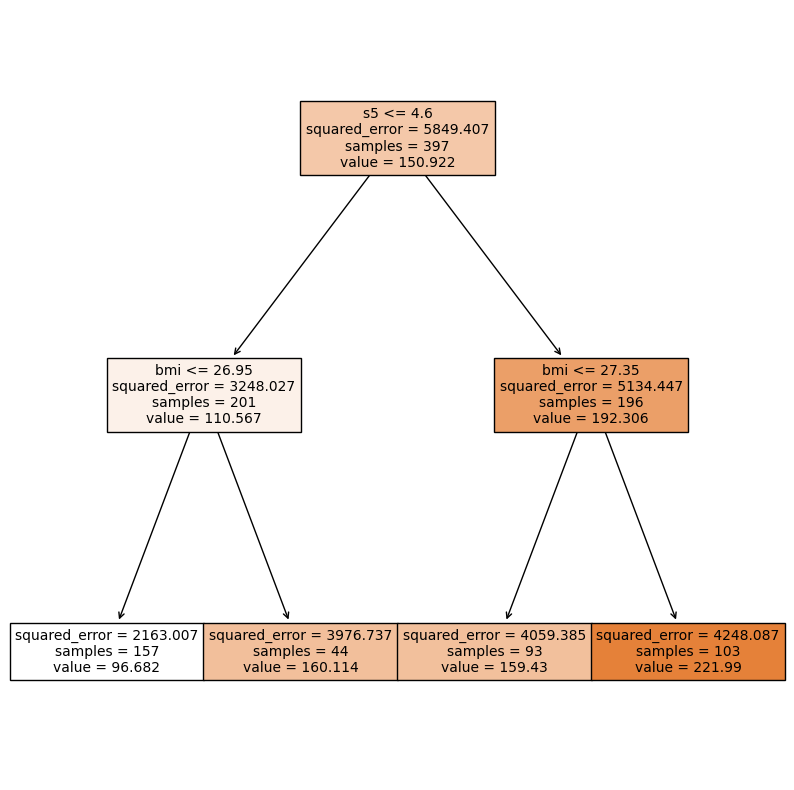

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10, 10])
plot_tree(reg,
     feature_names=x.columns,
     filled=True)

$ RMSE = \frac{1}{n} \sum_{i=1}^n{(p-u)^2} $

$ MIE = \sqrt( \frac{1}{n} \sum_{i=1}^n{(prei-ytest)^2} )$

$ MAE = \frac{1}{n} \sum_{i=1}^n{|p-u|} $

$ \frac {1}{n} \sum (prei-truei)^2 = a$

$ \frac{1}{n}\sum (y-truei)^2 = b$ 平均-真實
認真猜的佔瞎猜的百分比

$ 1 - \frac{a}{b} $ r^2 Score

```
ytest    mae    rmse
case1 5 5  5     5
case2 0 10  5    
```

In [16]:
from sklearn.metrics import r2_score
pre=reg.predict(x_test)
r2_score(y_test,pre)

0.4346292907658028

[Text(0.5, 0.8333333333333334, 's5 <= 4.6\nsquared_error = 5849.407\nsamples = 397\nvalue = 150.922'),
 Text(0.25, 0.5, 'bmi <= 26.95\nsquared_error = 3248.027\nsamples = 201\nvalue = 110.567'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'bmi <= 27.35\nsquared_error = 5134.447\nsamples = 196\nvalue = 192.306'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

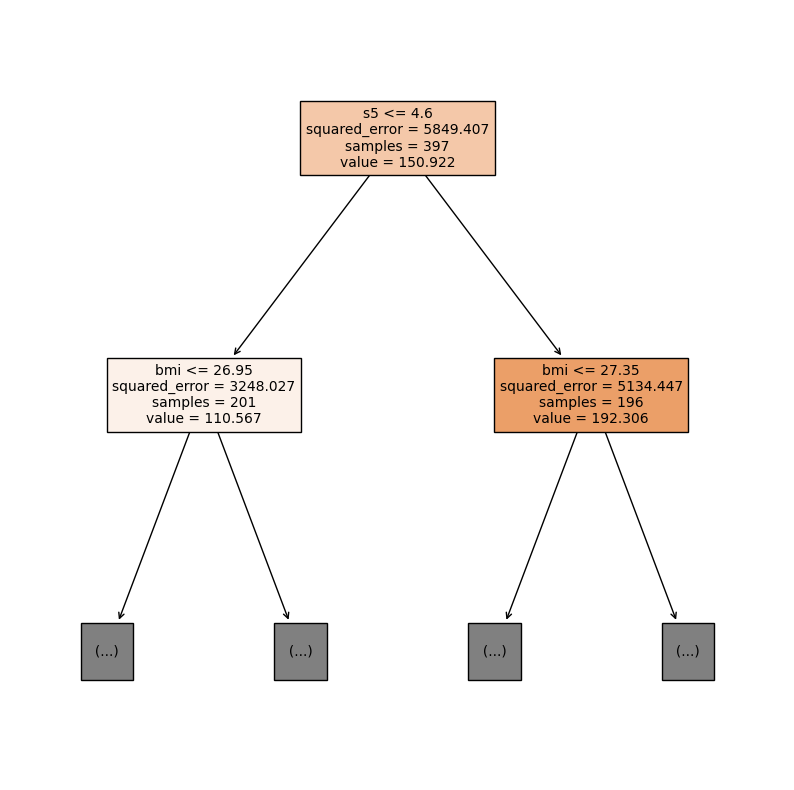

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10, 10])
plot_tree(reg,
     feature_names=x.columns,
     filled=True,
     max_depth=1)